In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math

In [39]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [40]:
winedf = pd.read_csv('winequalityN.csv')
winedf

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [42]:
#columnwise null values
winedf.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [43]:
# remove null rows
wine_df = winedf.dropna()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [44]:
wine_df.type.unique()

array(['white', 'red'], dtype=object)

There are two types of wine 'red' and 'white'

In [45]:
# let's convert the column 'type' into numeric datatype
# white = 1 and red = 0
wine_df.rename(columns={'type':'white_wine'},inplace=True)

In [46]:
wine_df.loc[wine_df["white_wine"] == "white", "white_wine"] = 1
wine_df.loc[wine_df["white_wine"] == "red", "white_wine"] = 0
wine_df

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
wine_df[['white_wine']]

,white_wine
0,1
1,1
2,1
3,1
4,1
...,...
6491,0
6492,0
6494,0
6495,0


In [11]:
wine_df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [12]:
# Changing 'quality' based on condition
# 0 = bad wine , 1 = good wine
wine_df.loc[wine_df['quality'] <= 6, 'quality'] = 0
wine_df.loc[wine_df['quality'] >= 7, 'quality'] = 1
wine_df.head()

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [13]:
#how many good wines
(wine_df['quality'] == 1).sum()

1271

<AxesSubplot:>

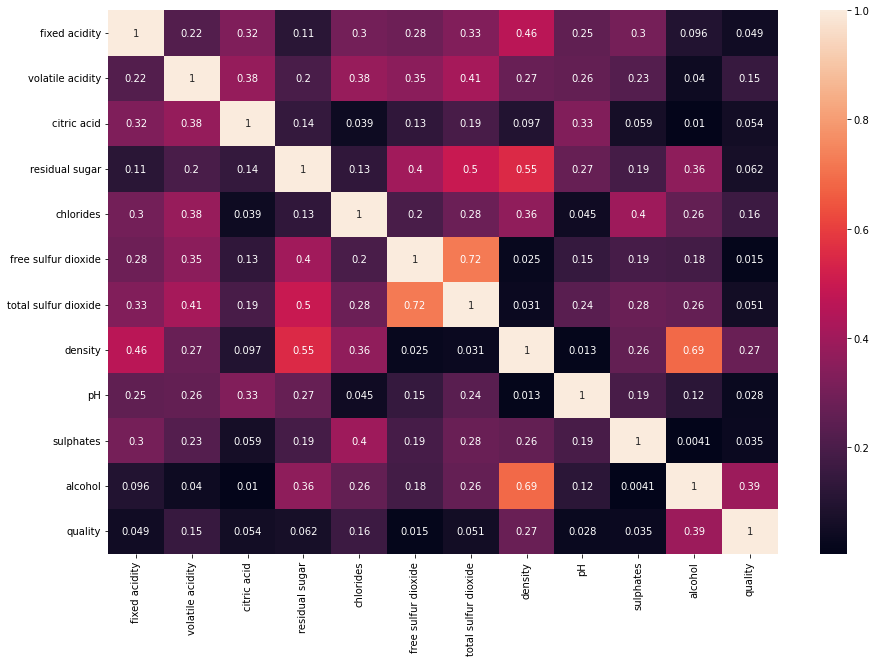

In [14]:
# Correlation mapping
plt.figure(figsize=(15,10))
sns.heatmap(wine_df.corr().abs(), annot=True)

Correlation matrix shows some correlation between quality and density and alcohol percentage.

## Normalizing data

In [15]:
# Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data
ft = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid",
    "residual sugar", "chlorides", "free sulfur dioxide",
    "total sulfur dioxide", "density", "pH", "sulphates",
    "alcohol"]), # Normalize these columns
)

In [16]:
X = wine_df.drop('quality',axis=1) #features
Y = wine_df['quality'] #label
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Split Training and Test Data

In [17]:
# first 80% for training
len(wine_df) * 0.80

5170.400000000001

In [18]:
# 80% for train and 20% for test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=66)

## Transform Training and Test data

In [19]:
# Transform training data
ft.fit(X_train)

# Transform training and test data with normalization
# MinMaxScaler
X_train_normal = ft.transform(X_train)
X_test_normal = ft.transform(X_test)

In [20]:
X_train_normal[1]

array([0.23966942, 0.12666667, 0.18674699, 0.23159509, 0.0448505 ,
       0.14930556, 0.39861751, 0.20802005, 0.40944882, 0.19101124,
       0.23188406])

In [21]:
y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
y_train

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

## The Model

In [22]:
# set random seed
tf.random.set_seed(66)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=keras.activations.relu), # hidden layer 1, ReLU activation
    tf.keras.layers.Dense(4, activation=keras.activations.relu), # hidden layer 2, ReLU activation
    tf.keras.layers.Dense(1, activation=keras.activations.sigmoid) #ouput layer, sigmoid activation
])

# complie the model (calculate errors, optimize and evaluate)
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model_1.fit(X_train_normal, y_train, epochs=100)

2022-07-15 03:07:47.054086: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-15 03:07:47.054897: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 5170 samples
Epoch 1/100
5170/5170 [==============================] - 1s 151us/sample - loss: 0.6369 - accuracy: 0.7750
Epoch 2/100
5170/5170 [==============================] - 0s 32us/sample - loss: 0.5169 - accuracy: 0.8056
Epoch 3/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4899 - accuracy: 0.8056
Epoch 4/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4808 - accuracy: 0.8056
Epoch 5/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4585 - accuracy: 0.8056
Epoch 6/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4353 - accuracy: 0.8056
Epoch 7/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4187 - accuracy: 0.8075
Epoch 8/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4093 - accuracy: 0.8118
Epoch 9/100
5170/5170 [==============================] - 0s 31us/sample - loss: 0.4047 - accuracy: 0.8128
Epoch 10/100
5170/5170 

**we are accurate at almost 82% on whether it is a good wine or not**

## Plot a Loss Curve

Text(0.5, 1.0, 'Model 1 Loss curve')

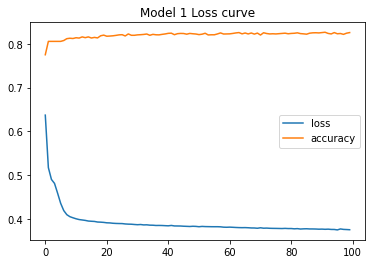

In [23]:
pd.DataFrame(history.history).plot()
plt.title('Model 1 Loss curve')

## Using Callback to find the ideal Learning Rate

In [24]:
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, 
epochs=100,
callbacks=[scheduler])

Train on 5170 samples
Epoch 1/100
5170/5170 [==============================] - 1s 116us/sample - loss: 0.6943 - accuracy: 0.5068
Epoch 2/100
5170/5170 [==============================] - 0s 32us/sample - loss: 0.6778 - accuracy: 0.7919
Epoch 3/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.6637 - accuracy: 0.8039
Epoch 4/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.6487 - accuracy: 0.8054
Epoch 5/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.6296 - accuracy: 0.8056
Epoch 6/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.6021 - accuracy: 0.8056
Epoch 7/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.5688 - accuracy: 0.8056
Epoch 8/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.5365 - accuracy: 0.8056
Epoch 9/100
5170/5170 [==============================] - 0s 33us/sample - loss: 0.5127 - accuracy: 0.8056
Epoch 10/100
5170/5170 

Text(0.5, 1.0, 'Learning Rate vs. Loss')

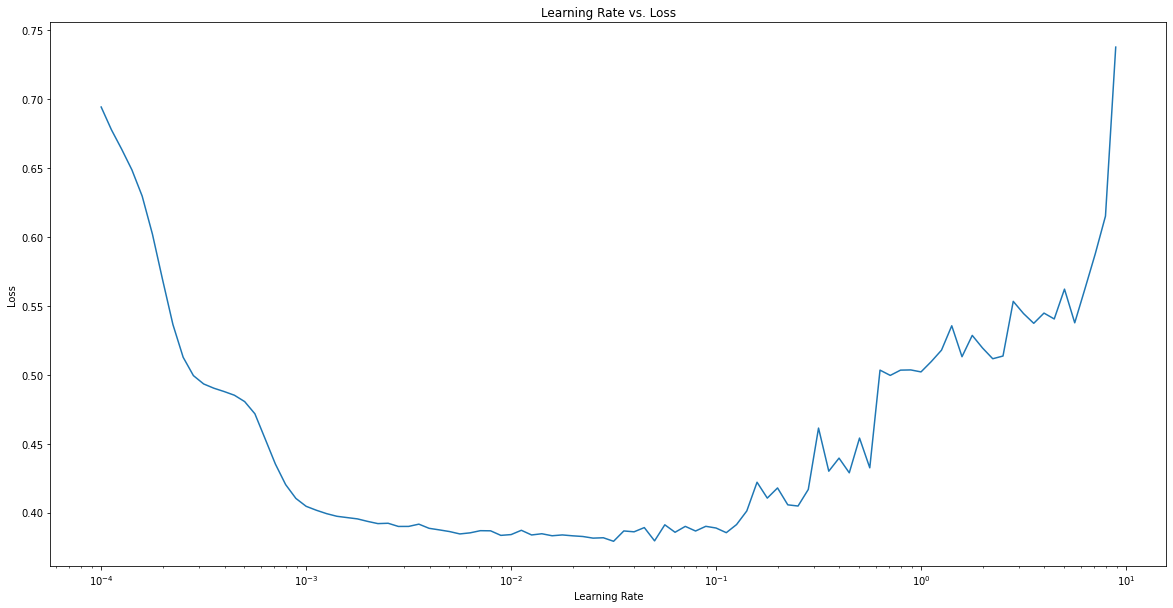

In [25]:
# Plotting learning rate vs the Loss

lr = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lr, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

**0.001 is around the best learning rate**

## Evaluating with Test Data

In [26]:
y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [27]:
loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

1293/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Model Accuracy on the test data is around 81%**